**Table of contents**<a id='toc0_'></a>    
- 1. [Imports:](#toc1_)    
- 2. [Model description](#toc2_)    
  - 2.1. [Analytical solution](#toc2_1_)    
  - 2.2. [Numerical solution](#toc2_2_)    
- 3. [Further analysis](#toc3_)    
  - 3.1. [Understanding the model - income vs substitution effects](#toc3_1_)    
  - 3.2. [Extension - preference heterogeneity](#toc3_2_)    
- 4. [Conclusion](#toc4_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

From hand to... mouth or pocket?
===============================

# 1. <a id='toc1_'></a>[Imports:](#toc0_)

In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import utils

# 2. <a id='toc2_'></a>[Model description](#toc0_)

Consider the following simple two-period (subscripts denotes time period) consumer problem with no uncertainty:

$$
\begin{align}
U &= \max_{c_1, c_2} \frac{c_1^{1-\rho}}{1-\rho}+\beta \frac{c_2^{1-\rho}}{1-\rho} &\\
\text{s.t.} \\
c_2 &= (1+r)(m_1-c_1) &\\
c_1 &\in [0, m_1]
\end{align}
$$

- $m_1$ is the cash endowed to a agent in the model. This only happens in period 1.
- $c_i$ denotes the consumption period $i$.
- $r$ is the interest rate
- Utility parameters:
    - $\beta>0$ denotes the discount factor (degree of patience)
    - $\rho>0, \rho\neq1$ is the coefficient of risk aversion.

## 2.1. <a id='toc2_1_'></a>[Analytical solution](#toc0_)

Because we assume that agents have consumed everything by period 2, thus leaving nothing as bequests, we can directly plug in the expression for $c_2$ into our maximization problem. We can then characterize the solution by FOC w.r.t $c_1$: 

**FOC**:

\begin{align*}
c_1^{-\rho}-(1+r)\beta [(1+r)(m_1-c_1)]^{-\rho} &= 0 \leftrightarrow \\
c_1-((1+r)\beta)^{{-\frac{1}{\rho}}} (1+r)(m_1-c_1) &= 0 \leftrightarrow \\
c_1 &= \frac{(1+r)(m_1-c_1)}{(\beta(1+r))^{\frac{1}{\rho}}} \leftrightarrow \\

c_1(\beta(1+r))^{\frac{1}{\rho}}+(1+r)c_1 &= (1+r)m_1 \leftrightarrow \\

c_1^* &= \frac{(1+r)m_1}{(\beta(1+r))^{\frac{1}{\rho}}+1+r}
\end{align*}

Where by it follows that:

$$
c_2^* = (1+r)\left(m_1 - \frac{(1+r)m_1}{(\beta(1+r))^{\frac{1}{\rho}}+1+r}\right)
$$

## 2.2. <a id='toc2_2_'></a>[Numerical solution](#toc0_)

From line 3, we can analyze the solution numerically, if we treat it as root finding solution:

$$
c_1 - \frac{(1+r)(m_1-c_1)}{(\beta(1+r))^{\frac{1}{\rho}}} = 0
$$

To do this, I use the (Quasi)-Newton method. It works by...

Let's see the solution for the following parameter values:

- $\rho=5$
- $m_1=1$
- $r=0.05$
- $\beta = 0.95$

In [2]:
rho = 5
m1 = 1
r = 0.05
beta = 0.95

c1_star, c2_star = utils.solve_cons_crra(m1, r, beta, rho)

print(f'The numerical solution to the maximization problem is given by (c1, c2) = ({c1_star:.4f}, {c2_star:.4f})')

The numerical solution to the maximization problem is given by (c1, c2) = (0.5123, 0.5121)


# 3. <a id='toc3_'></a>[Further analysis](#toc0_)
## 3.1. <a id='toc3_1_'></a>[Understanding the model - income vs substitution effects](#toc0_)

Let us know dive a little into the mechanics of this model. The common terms 'substitution' and 'income' effect gets thrown around a lot in economic maximization problems. They are easily mistaken for each other.

Consider a range of values for the interest rate $r$ for $\rho = 0.5, 0.99, 2$.

Text(0.5, 0.01, 'Interest rate, $r$')

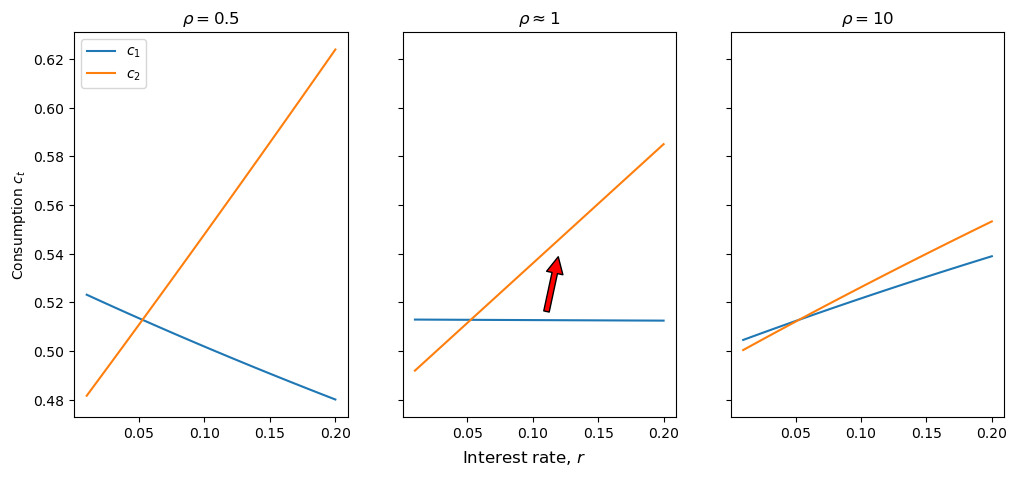

In [4]:
# Defining grids
r_grid = np.linspace(0.01, 0.20, 100)
rho_low = 0.5
rho_one = 0.99
rho_high = 5

c1_grids_low = np.empty(100)
c2_grids_low = np.empty(100)

c1_grids_one = np.empty(100)
c2_grids_one = np.empty(100)

c1_grids_high = np.empty(100)
c2_grids_high = np.empty(100)

for i, r in enumerate(r_grid):
    c1_grids_low[i], c2_grids_low[i] = utils.solve_cons_crra(m1, r, beta, rho_low)

    c1_grids_one[i], c2_grids_one[i] = utils.solve_cons_crra(m1, r, beta, rho_one)

    c1_grids_high[i], c2_grids_high[i] = utils.solve_cons_crra(m1, r, beta, rho_high)

fig, ax = plt.subplots(1, 3, figsize=(12,5), sharey=True)
ax[0].plot(r_grid, c1_grids_low, label='$c_1$')
ax[0].plot(r_grid, c2_grids_low, label='$c_2$')
ax[0].set_title(r'$\rho=0.5$')
ax[0].set_ylabel(r'Consumption $c_t$')
ax[0].legend()

ax[1].plot(r_grid, c1_grids_one, label='$c_1$')
ax[1].plot(r_grid, c2_grids_one, label='$c_2$')
ax[1].set_title(r'$\rho\approx 1$')


ax[2].plot(r_grid, c1_grids_high, label='$c_1$')
ax[2].plot(r_grid, c2_grids_high, label='$c_2$')
ax[2].set_title(r'$\rho = 10$')
# Adding an arrow to the third subplot (rho=10)
arrow_start = (0.11, 0.515)
arrow_end = (0.12, 0.54)
ax[1].annotate('', xy=arrow_end, xytext=arrow_start, arrowprops=dict(facecolor='red', shrink=0.05))

fig.supxlabel(r'Interest rate, $r$')

In [5]:
# Defining grids
rho_grid = np.linspace(0.01, 2, 100)
r_low = 0.01
r_med = 0.05
r_high = 0.1

c1_grids_low = np.empty(100)
c2_grids_low = np.empty(100)

c1_grids_med = np.empty(100)
c2_grids_med = np.empty(100)

c1_grids_high = np.empty(100)
c2_grids_high = np.empty(100)

for i, rho in enumerate(rho_grid):
    c1_grids_low[i], c2_grids_low[i] = utils.solve_cons_crra(m1, r_low, beta, rho)

    c1_grids_med[i], c2_grids_med[i] = utils.solve_cons_crra(m1, r_med, beta, rho)

    c1_grids_high[i], c2_grids_high[i] = utils.solve_cons_crra(m1, r_high, beta, rho)



Text(0.5, 0.01, 'Coefficient of risk aversion $\\rho$')

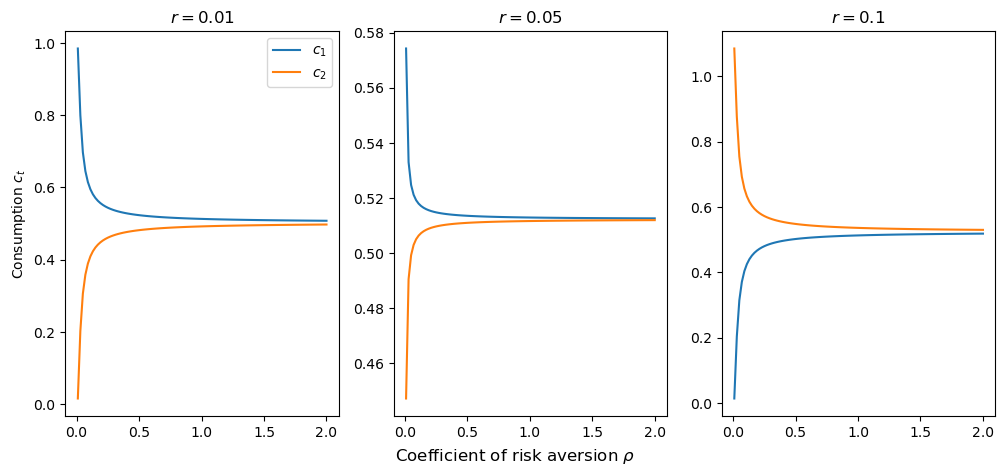

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(12,5))
ax[0].plot(rho_grid, c1_grids_low, label='$c_1$')
ax[0].plot(rho_grid, c2_grids_low, label='$c_2$')
ax[0].set_title(r'$r=0.01$')
ax[0].set_ylabel(r'Consumption $c_t$')
ax[0].legend()

ax[1].plot(rho_grid, c1_grids_med, label='$c_1$')
ax[1].plot(rho_grid, c2_grids_med, label='$c_2$')
ax[1].set_title(r'$r=0.05$')


ax[2].plot(rho_grid, c1_grids_high, label='$c_1$')
ax[2].plot(rho_grid, c2_grids_high, label='$c_2$')
ax[2].set_title(r'$r = 0.1$')
fig.supxlabel(r'Coefficient of risk aversion $\rho$')

## 3.2. <a id='toc3_2_'></a>[Extension - preference heterogeneity](#toc0_)

Note here that subscript $i$ denotes agent "type".

Period 2:

$$
\begin{align}
v_2(m_2) &= \max_{c_2} \frac{c_2^{1-\rho}}{1-\rho}+\gamma_i \frac{(m_2-c_2+\kappa)^{1-\rho}}{1-\rho} &\\
\text{s.t.} \\
c_2 &\in [0, m_2]
\end{align}
$$

Period 1:

$$
\begin{aligned}
v_1(m_1)&=\max_{c_1}\frac{c_{1}^{1-\rho}}{1-\rho}+\beta\mathbb{E}_{1}\left[v_2(m_2)\right]\\&\text{s.t.}&\\
m_2&= (1+r)(m_1-c_1)+y_2 \\
y_{2}&= \begin{cases}
1+\Delta & \text{with prob. }p_i\\
1-\Delta & \text{with prob. }1-p_i 
\end{cases}\\
c_1&\in [0,m_1]
\end{aligned}
$$

Where agent $i = 1,2$ faces different income risk $\Delta$ later in life. Further, they differ in terms of their "bequest" motive $\gamma_i$.

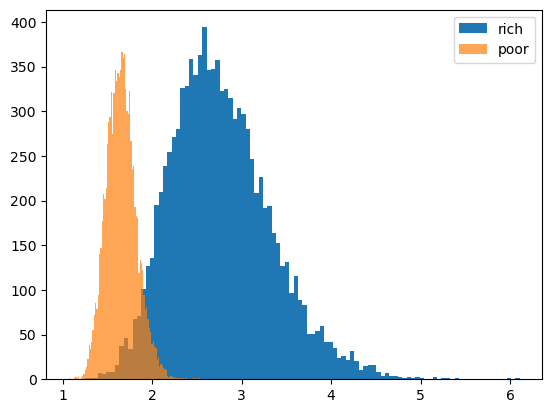

In [24]:
seed = np.random.seed(2000)
N = 10_000

m1_rand = np.random.lognormal(1,.2,size=N)
m1_rand2 = np.random.lognormal(0.5,0.1,size=N)

fig,ax = plt.subplots()
ax.hist(m1_rand, bins=100, label='rich')
ax.hist(m1_rand2, bins=100, label='poor', alpha=0.7)
ax.legend()

In [35]:
rho = 4
kappa = 1.5
gamma = 20
beta=0.94
r = 0.05
delta = 0.5

m1_grid, c1_grid, m2_grid, c2_grid = utils.solvez(rho, kappa, gamma, beta, r, delta, v1=utils.v1_func)

c1_interp = utils.interp(m1_grid, c1_grid)
c2_interp = utils.interp(m2_grid, c2_grid)

# period 1
sim_c1 = c1_interp(m1_rand)
sim_a1 = m1_rand-sim_c1

# period 2
sim_m2 = (1+r)*sim_a1

# period 2
sim_c2 = c2_interp(sim_m2)


rho = 4
kappa = 2.5
gamma = 0.1
beta=0.94
r = 0.05
delta = 0.5

m1_grid, c1_grid, m2_grid, c2_grid = utils.solvez(rho, kappa, gamma, beta, r, delta, v1=utils.v1_func)

c1_interp = utils.interp(m1_grid, c1_grid)
c2_interp = utils.interp(m2_grid, c2_grid)

# period 1
sim_c1_2 = c1_interp(m1_rand)
sim_a1 = m1_rand-sim_c1

# period 2
sim_m2 = (1+r)*sim_a1

# period 2
sim_c2 = c2_interp(sim_m2)

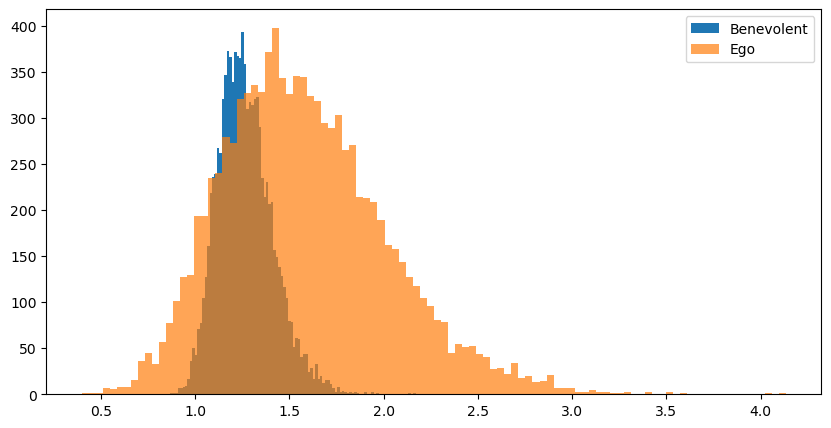

In [36]:
fig,ax = plt.subplots(figsize=(10,5))
ax.hist(sim_c1, bins=100, label='Benevolent')
ax.hist(sim_c2, bins=100, label='Ego', alpha=0.7)

ax.legend()

In [92]:
ax.hist(sim_c1, label='Ego')

...

Joint solve function works.

- 2 sets of agents:
    - One low-earning, facing "high" risk and no bequest motive
    - One high-earning, facing "low" risk and strong bequest motive
- Draw $N=10,000$ for both sets and see the distribution/density of consumption in period 1. Who has the strongest precautionary savings motive?
- Describe the algorithm
- Fine-tune the $m1$-grid

# 4. <a id='toc4_'></a>[Conclusion](#toc0_)

Add concise conclusion. 